## Black Friday Dataset EDA And Feature Engineering
   Cleaning and preparing the data for model training

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [38]:
#importing the dataset
#importing the dataset
df_train=pd.read_csv(r'D:\black friday\train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
##  import the test data
df_test=pd.read_csv(r'D:\blackfridaytest\test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [73]:
df_total = df_train.append(df_test)
df_total.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [74]:
df_total.shape

(783667, 12)

In [75]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [53]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Just from a initial look it seems like the User_ID columns will be of no use as it only represent a customer identity. Since we already have the custyomer details the user id will be an dependant feature and can be eliminated

In [76]:
df_total.drop(['User_ID'], axis=1, inplace=True)
df_total.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## HANDLE CATEGORICAL VALUES

In [77]:
df_total['Gender'] = df_total['Gender'].map({'F':1, 'M':2})
df_total.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,2,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### NEXT step AGE COLUMN

In [78]:
df_total['Age'].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [79]:
df_total['Age'] = df_total['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df_total.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,2,7,16,C,4+,0,8,NaN,NaN,7969.0


#### in  city_category we have so many dummies so we have to remove the dummies first 

In [80]:
df_city = pd.get_dummies(df_total[['City_Category']], drop_first=True)
df_city.head()

,City_Category_B,City_Category_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [81]:
df_total = pd.concat([df_total, df_city], axis=1)
df_total.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,2,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [82]:
df_total.drop('City_Category', inplace=True, axis=1)
df_total.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,2,7,16,4+,0,8,NaN,NaN,7969.0,0,1


## MISSING VALUES

In [83]:
df_total.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [84]:
df_total['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [85]:
df_total['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

#### As per the link I shared at the start it is adviced to use "mode" to replace the missing value. In my opinion and understanding product category can represent a type of product. Since there are 3 categories what it define is given a product which category it belongs to.

For example if I consider product refrigerators then it can be in product category 1 "Electronics" as well as product category 2 "Home Appliance". So if a product category is given NAN or null then it can be interpreted that the product do not belong to that category. Hence I will choose to replace the null values with 0.

In [86]:
df_total['Product_Category_2'].fillna('0', inplace=True)
df_total['Product_Category_2'] = df_total['Product_Category_2'].astype(float)
df_total['Product_Category_3'].fillna('0', inplace=True)
df_total['Product_Category_3'] = df_total['Product_Category_3'].astype(float)

In [87]:
df_total.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,1,1,10,2,0,3,0.0,0.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,0.0,0.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,0.0,1057.0,0,0
4,P00285442,2,7,16,4+,0,8,0.0,0.0,7969.0,0,1


In [88]:
df_total['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [89]:
df_total['Stay_In_Current_City_Years'] = df_total['Stay_In_Current_City_Years'].str.replace('+', '')
df_total['Stay_In_Current_City_Years'].value_counts()

C:\Users\MANOJV~1\AppData\Local\Temp/ipykernel_2120/1942080589.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_total['Stay_In_Current_City_Years'] = df_total['Stay_In_Current_City_Years'].str.replace('+', '')


1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [90]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  City_Category_B             783667 non-null  uint8  
 11  City_Category_C             783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


## Since we know the column "Stay_In_Current_City_Years " has all int value it is still listed as object i.e. string. So we need to convert the datatype.

similar for City_Category_B and City_Category_C

In [91]:
df_total['Stay_In_Current_City_Years'] = df_total['Stay_In_Current_City_Years'].astype(int)
df_total['City_Category_B'] = df_total['City_Category_B'].astype(int)
df_total['City_Category_C'] = df_total['City_Category_C'].astype(int)

In [92]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  City_Category_B             783667 non-null  int32  
 11  City_Category_C             783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


## NOW WE HAD COMPLETED THE FEATURE ENGINEERING

In [93]:
df_total.reindex()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,P00069042,1,1,10,2,0,3,0.0,0.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,0.0,0.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,0.0,1057.0,0,0
4,P00285442,2,7,16,4,0,8,0.0,0.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,3,15,4,1,8,0.0,0.0,NaN,1,0
233595,P00254642,1,3,15,4,1,5,8.0,0.0,NaN,1,0
233596,P00031842,1,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,1,5,1,4,0,10,16.0,0.0,NaN,0,1


D:\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

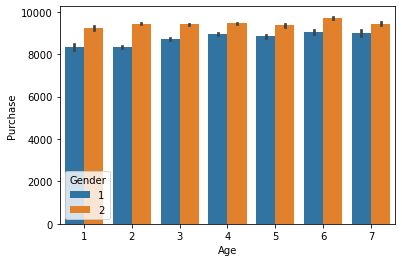

In [94]:
sns.barplot('Age', 'Purchase', hue='Gender', data=df_total)

D:\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

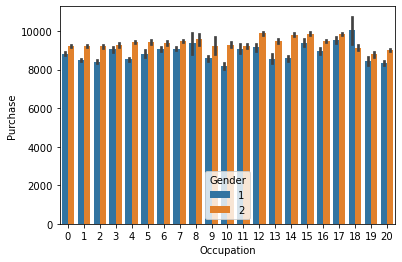

In [95]:
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df_total)

D:\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

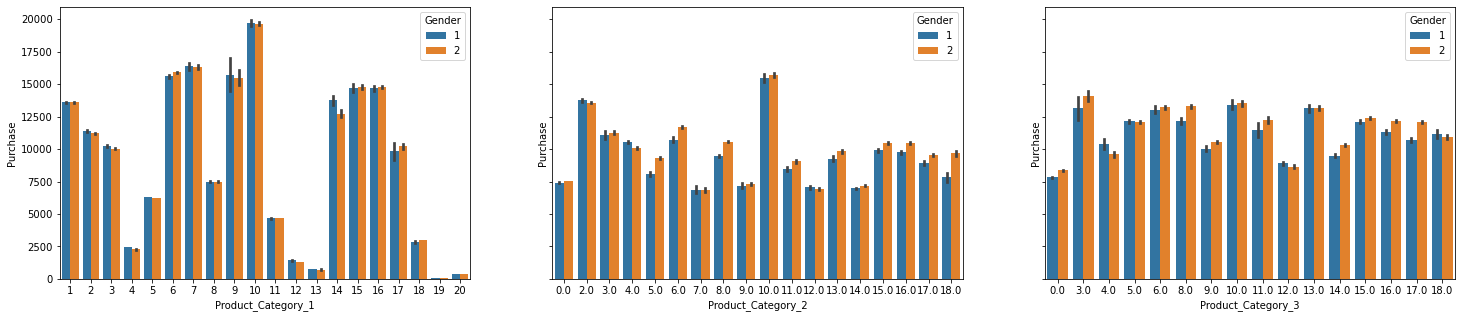

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df_total, ax=axes[0])
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df_total, ax=axes[1])
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df_total, ax=axes[2])

### observation 3 :
Again male to femal purchase capacity is almost same for all categories
Product Category 10 is biggets across all categories
Product Category 1 distribution is bit different comapred to other cartegories. Where category 2 and 3 has equal distributiono